# Model Training

### Import Data and Required Packages

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import OneHotEncoder,StandardScaler,LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score,recall_score, roc_curve, roc_auc_score
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split

## Data Collection

In [11]:
data = pd.read_csv(r"Notebook\Data\kdd_data.csv")

FileNotFoundError: [Errno 2] No such file or directory: 'Notebook\\Data\\kdd_data.csv'

In [9]:
data

NameError: name 'data' is not defined

## Data Preprocessing

In [66]:
data.replace(["","null"],np.nan,inplace=True)

In [67]:
data.isnull().sum()

duration                       0
protocol_type                  0
service                        0
flag                           0
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
num_compromised                0
root_shell                     0
su_attempted                   0
num_root                       0
num_file_creations             0
num_shells                     0
num_access_files               0
num_outbound_cmds              0
is_host_login                  0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
srv_serror_rate                0
rerror_rate                    0
srv_rerror_rate                0
same_srv_rate                  0
diff_srv_rate                  0
srv_diff_h

In [68]:
data.duplicated().sum()

15791

In [69]:
data.drop_duplicates(inplace=True)

In [70]:
data.labels.value_counts()

labels
normal             70310
neptune            42612
satan               3862
ipsweep             3615
portsweep           2965
smurf               2767
nmap                1523
back                1055
teardrop             896
warezclient          890
guess_passwd         456
mscan                310
warezmaster          296
apache2              228
processtable         211
pod                  206
snmpguess             99
mailbomb              94
saint                 93
snmpgetattack         43
httptunnel            41
buffer_overflow       40
land                  18
multihop              15
rootkit               13
imap                  11
loadmodule            10
ps                     9
ftp_write              9
sendmail               8
phf                    5
perl                   4
xlock                  4
xterm                  3
named                  2
spy                    2
xsnoop                 1
Name: count, dtype: int64

In [71]:
data['labels'] = data['labels'].apply(lambda x: "attack" if x != "normal" else x)

In [72]:
data['labels'].value_counts()

labels
normal    70310
attack    62416
Name: count, dtype: int64

In [73]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 132726 entries, 0 to 148516
Data columns (total 42 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   duration                     132726 non-null  int64  
 1   protocol_type                132726 non-null  object 
 2   service                      132726 non-null  object 
 3   flag                         132726 non-null  object 
 4   src_bytes                    132726 non-null  int64  
 5   dst_bytes                    132726 non-null  int64  
 6   land                         132726 non-null  int64  
 7   wrong_fragment               132726 non-null  int64  
 8   urgent                       132726 non-null  int64  
 9   hot                          132726 non-null  int64  
 10  num_failed_logins            132726 non-null  int64  
 11  logged_in                    132726 non-null  int64  
 12  num_compromised              132726 non-null  int64  
 13  root

In [80]:
data['labels'].value_counts()

labels
normal    70310
attack    62416
Name: count, dtype: int64

In [75]:
data['protocol_type'].value_counts()

protocol_type
tcp     108427
udp      15804
icmp      8495
Name: count, dtype: int64

In [78]:
data['service'].unique()

array(['smtp', 'domain_u', 'other', 'private', 'http', 'ecr_i', 'mtp',
       'netstat', 'http_443', 'uucp_path', 'eco_i', 'imap4', 'ldap',
       'Z39_50', 'discard', 'csnet_ns', 'pop_3', 'ftp_data', 'klogin',
       'finger', 'courier', 'auth', 'systat', 'supdup', 'telnet',
       'iso_tsap', 'ssh', 'ftp', 'exec', 'netbios_ssn', 'whois',
       'netbios_ns', 'domain', 'urp_i', 'uucp', 'pop_2', 'nntp', 'kshell',
       'time', 'ctf', 'efs', 'IRC', 'nnsp', 'sunrpc', 'ntp_u', 'bgp',
       'gopher', 'hostnames', 'daytime', 'link', 'sql_net', 'echo', 'X11',
       'netbios_dgm', 'shell', 'vmnet', 'name', 'remote_job', 'login',
       'printer', 'pm_dump', 'rje', 'red_i', 'tim_i', 'urh_i', 'aol',
       'http_8001', 'http_2784', 'tftp_u', 'harvest'], dtype=object)

In [5]:
data["flag"].value_counts()

NameError: name 'data' is not defined

## Data Encoding

In [83]:
x = data.drop(columns=["labels"])
y = data['labels']

In [85]:
# Mapping values
mapping = {'normal':0, 'attack':1}
y = y.map(mapping)

In [91]:
num_pipeline = Pipeline(steps=[
    ("scaler",StandardScaler())
])

cat_pipeline = Pipeline(steps=[
    ("encoding",OneHotEncoder())
])

columns_transform = ColumnTransformer([
    ("num_pipeline",num_pipeline,x.select_dtypes(exclude="object").columns),
    ("cat_pipeline",cat_pipeline,x.select_dtypes(include="object").columns),]
)

In [1]:
x.select_dtypes(exclude="object").columns

NameError: name 'x' is not defined

In [2]:
x.select_dtypes(include="object").columns

NameError: name 'x' is not defined

In [92]:
X = columns_transform.fit_transform(x)

## Data Spliting

In [100]:
X_train , X_test , y_train , y_test = train_test_split(X,y,test_size=0.2,random_state=42)

## Model Selection

In [101]:
models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest Classifier": RandomForestClassifier(n_estimators=100),
    "Gradient Boosting Classifier": GradientBoostingClassifier(learning_rate=0.1, n_estimators=100),
    "XGBClassifier": XGBClassifier(learning_rate=0.1, max_depth=6, n_estimators=100, random_state=42),
    "K-Neighbors Classifier": KNeighborsClassifier(n_neighbors=3),
    "Super Vector Machine" : SVC(),
    "AdaBoost Classifier": AdaBoostClassifier()
}

model_list = []
accuracy_list = []
precision_list = []
recall_list = []

for i in range(len(models)):
    model = list(models.values())[i]
    model.fit(X_train, y_train)  # Train model

    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Evaluate Train and Test dataset
    accuracy_train = accuracy_score(y_train, y_train_pred)
    accuracy_test = accuracy_score(y_test, y_test_pred)
    precision_test = precision_score(y_test, y_test_pred, average='weighted')  # 'weighted' for multiclass
    recall_test = recall_score(y_test, y_test_pred, average='weighted')

    # Confusion matrix (optional)
    conf_matrix = confusion_matrix(y_test, y_test_pred)

    # Print results
    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])

    print('Model performance for Training set')
    print("- Accuracy: {:.4f}".format(accuracy_train))

    print('----------------------------------')

    print('Model performance for Test set')
    print("- Accuracy: {:.4f}".format(accuracy_test))
    print("- Precision: {:.4f}".format(precision_test))
    print("- Recall: {:.4f}".format(recall_test))

    print('Confusion Matrix:')
    print(conf_matrix)

    # Append test metrics for comparison
    accuracy_list.append(accuracy_test)
    precision_list.append(precision_test)
    recall_list.append(recall_test)

    print('=' * 35)
    print('\n')

c:\Users\ADMIN\anaconda3\envs\jay\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression
Model performance for Training set
- Accuracy: 0.9666
----------------------------------
Model performance for Test set
- Accuracy: 0.9665
- Precision: 0.9667
- Recall: 0.9665
Confusion Matrix:
[[13721   312]
 [  576 11937]]


Decision Tree
Model performance for Training set
- Accuracy: 0.9998
----------------------------------
Model performance for Test set
- Accuracy: 0.9968
- Precision: 0.9968
- Recall: 0.9968
Confusion Matrix:
[[13989    44]
 [   41 12472]]


Random Forest Classifier
Model performance for Training set
- Accuracy: 0.9998
----------------------------------
Model performance for Test set
- Accuracy: 0.9980
- Precision: 0.9980
- Recall: 0.9980
Confusion Matrix:
[[14016    17]
 [   36 12477]]


Gradient Boosting Classifier
Model performance for Training set
- Accuracy: 0.9922
----------------------------------
Model performance for Test set
- Accuracy: 0.9915
- Precision: 0.9915
- Recall: 0.9915
Confusion Matrix:
[[13957    76]
 [  149 12364]]


XGBC

c:\Users\ADMIN\anaconda3\envs\jay\lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoost Classifier
Model performance for Training set
- Accuracy: 0.9828
----------------------------------
Model performance for Test set
- Accuracy: 0.9835
- Precision: 0.9835
- Recall: 0.9835
Confusion Matrix:
[[13864   169]
 [  270 12243]]




### Model Result

In [102]:
results_df = pd.DataFrame(list(zip(model_list, accuracy_list, precision_list, recall_list)),columns=['Model Name', 'Accuracy', 'Precision', 'Recall']).sort_values(by=["Accuracy"], ascending=False)
results_df

,Model Name,Accuracy,Precision,Recall
2,Random Forest Classifier,0.998003,0.998004,0.998003
4,XGBClassifier,0.997363,0.997364,0.997363
1,Decision Tree,0.996798,0.996798,0.996798
5,K-Neighbors Classifier,0.994877,0.994878,0.994877
3,Gradient Boosting Classifier,0.991524,0.991536,0.991524
6,Super Vector Machine,0.989226,0.989226,0.989226
7,AdaBoost Classifier,0.983463,0.983484,0.983463
0,Logistic Regression,0.966549,0.966696,0.966549


## Model Training

#### Random Forest Classifier

In [108]:
best_model = RandomForestClassifier(n_estimators=120,random_state=42)
best_model.fit(X_train,y_train)
y_pred = best_model.predict(X_test)
accracy = accuracy_score(y_test,y_pred)
print(" Accuracy of the model is %.2f" %accracy)
confusion = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:",confusion)

 Accuracy of the model is 1.00
Confusion Matrix: [[14016    17]
 [   40 12473]]


## Confusion Metrix

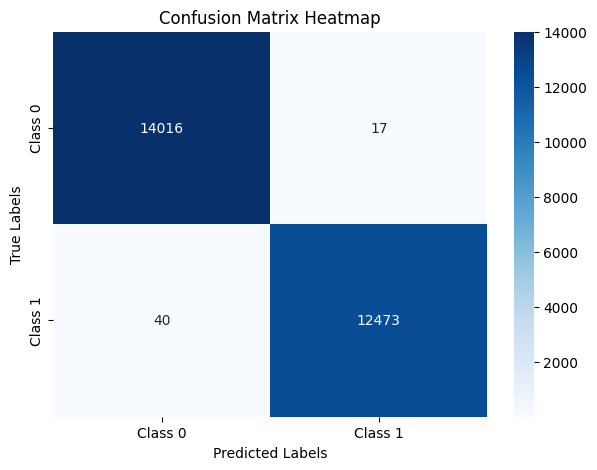

In [109]:
plt.figure(figsize=(7, 5))
sns.heatmap(confusion, annot=True, fmt='g', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.title('Confusion Matrix Heatmap')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
# plt.savefig('Confusion matrix')
plt.show()

## AUC Score

In [113]:
y_prob = best_model.predict_proba(X_test)[:, 1]

# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

# Compute AUC score
auc_score = roc_auc_score(y_test, y_prob)
print(f"AUC Score: {auc_score:.4f}")

AUC Score: 0.9999


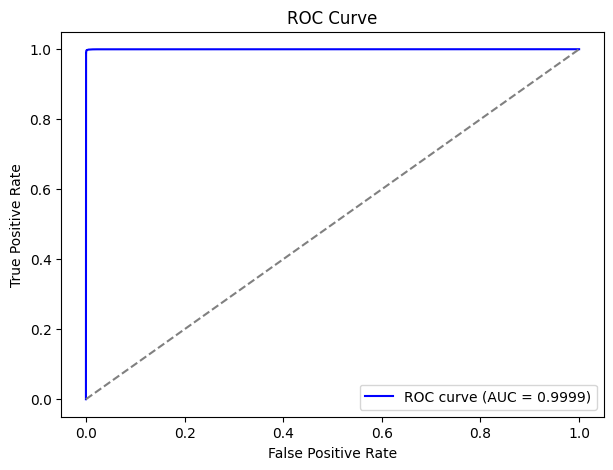

In [114]:
plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (AUC = {auc_score:.4f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
# plt.savefig('auc or roc curve')
plt.show()